# PSD analysis figures
* something is off about "network" definition and according distribution plots -> fix
* distribution plots don't really have to be in here (or rather move all figures to a single notebook?!)

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
from pathlib import Path
# root_dir = Path().parent
# root_dir = os.path.dirname(os.path.abspath(''))

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

# print(root_dir)
# if not root_dir in sys.path:
#     sys.path.insert(0, str(root_
# root_dir = Path.cwd().parent
# print(root_dir)
# if not root_dir in sys.path:
#     sys.path.insert(0, str(root_dir))


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from darkMatter import *

# from general.plot_statistics import *
# from general.utils import set_plot_params

from DM_theory.network import network

/home/wollex/Documents/Science/WolfGroup/DarkMatter/Programme


In [3]:
steps = 100  # correct for removal of first item

L = 1
S = [1, 2]

J_l = np.ones((L, L))
np.fill_diagonal(J_l, 0)

options = {
    # count of layers, populations, PSPs
    "L": L,
    "P": 2,
    "S": S,  # contains number of synapses for each population
    # layer level parameters
    "eps": 1.0 / np.sqrt(2),
    "eta": 0.9,
    "J0_l": J_l,
    "kappa": 1.0,
    # population level parameters
    "I_ext": -1,
    "rateWnt": 1.0,
    "alpha_0": 0.02,
    "tau_M": 0.01,
    "J0": 1.0,
    # psp level parameters
    "tau_I": [0.01, 0.005, 0.2],
    "tau_n": 0.0,
    "tau_norm": 1.0,
    # 'order': ['tau_G','n','alpha_0','rateWnt','eta','eps'],
    "mode": 0,
    "mode_stats": 0,
    "mode_calc": 0,
    "simulation": {
        # for each iteration parameter, specify (layer,population,psp)-tuple
        # specify -1 if a level of hierarchy is non-applicable
        # specify 'None' if should be applied to all candidates
        "rateWnt": [0.0, 20.0],
        "tau_n": [0.0, 1.0],
        "sim_prim": [
            0,
            -1,
            0,
        ],  # when population parameters are iterated, specify population number(s) (empty = all)
        "sim_sec": [
            0,
            1,
            1,
        ],  # when synaptic timeconstants are iterated, specify number within population
    },
}

In [4]:
res = darkMatter(steps=steps, options=options, rerun=True, compile=False)

DM suffix: 
rateWnt [0.0, 20.0] <class 'list'>
tau_n [0.0, 1.0] <class 'list'>
sim_prim [0, -1, 0] <class 'list'>
sim_sec [0, 1, 1] <class 'list'>


In [5]:
res.keys()

dict_keys(['rateWnt', 'tau_n', 'q', 'gamma', 'delta', 'rate_max', 'chi', 'I_balance', 'regions', 'implausible', 'inc_trans', 'imp_trans', 'DM_trans', 'np_trans'])

In [6]:
order = list(options["simulation"].keys())

In [7]:
net = network(**options)

In [8]:
net.sigma_V(nu=np.array([[1.0], [1.0]]), p=0)

array([0.04212868])

In [9]:
net.r = 0.9
net.gamma(nu=np.array([[1.0], [1.0]]), q=np.array([[1.1], [1.1]]), p=1)

array([1.77231862])

In [10]:
res["q"]

masked_array(
  data=[[[  4.49470005,   8.82720639,  13.26016542, ..., 535.14795489,
          540.9605098 , 546.77669511],
         [  4.66344218,   9.18526576,  13.80461403, ..., 545.88883136,
          551.78638241, 557.68709762],
         [  4.84973231,   9.57774712,  14.3997808 , ..., 558.27234829,
          564.27154956, 570.27368795],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]],

        [[  4.49470003,   8.82720639,  13.26016542, ..., 535.14795489,
          540.9605098 , 546.77669511],
         [  4.66344218,   9.18526576,  13.80461403, ..., 545.88883136,
          551.78638241, 557.68709762],
         [  4.84973232,   9.57774712,  14.3997808 , ..., 558.27234829,
          564.27154

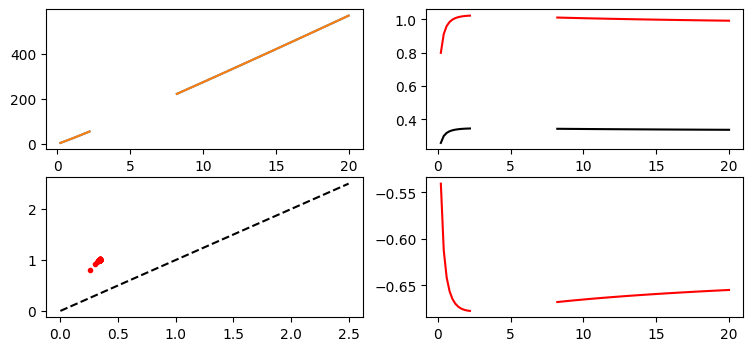

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(9, 4))
p = 0
i = 2

net.r = res["tau_n"][i]
gamma_net = net.gamma(nu=np.tile(res["rateWnt"], (2, 1)), q=res["q"][:, i, :], p=p)
ax[0][0].plot(res["rateWnt"], res["q"][0, i, :])
ax[0][0].plot(res["rateWnt"], res["q"][1, i, :])

ax[0][1].plot(res["rateWnt"], res["gamma"][p, i, :], "k-")
ax[0][1].plot(res["rateWnt"], gamma_net, "r-")

ax[1][0].plot([0, 2.5], [0, 2.5], "k--")
ax[1][0].plot(
    res["gamma"][p, i, :],
    net.gamma(nu=np.tile(res["rateWnt"], (2, 1)), q=res["q"][:, i, :], p=p),
    "r.",
)

ax[1][1].plot(res["rateWnt"], res["gamma"][p, i, :] - gamma_net, "r-")
plt.show()

In [12]:
# np.tile(res["rateWnt"][i1], (2, 1))

rate=2.0, r=0.7000000000000001
gamma=nan, delta=nan
[16.15987924]
rate=0.6000000000000001, r=0.1
gamma=0.16970349816651223, delta=2.358659737531167
[18.9357308]


/home/wollex/Documents/Science/WolfGroup/DarkMatter/Programme/DM_theory/network.py:112: RuntimeWarning: divide by zero encountered in divide
  distr = self.gamma(nu,q,p)/(self.rate_max(nu,p)*np.sqrt(-np.pi*np.log(rate_ratio)))* \


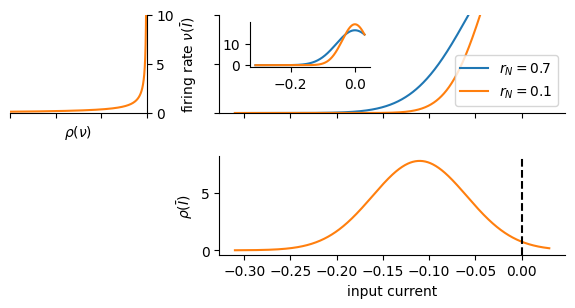

In [13]:
from matplotlib import pyplot as plt

p = 1
i1 = 30  # idx in tau_n
i2 = 10  # idx in rate
net = network(**options)

fig = plt.figure(figsize=(6, 3))
gs = fig.add_gridspec(2, 3)

ax_I = fig.add_subplot(gs[1, 1:])
ax_response = fig.add_subplot(gs[0, 1:])
ax_fr = fig.add_subplot(gs[0, 0])

ax_response_inset = fig.add_subplot()
plt.setp(ax_response_inset, position=[0.725, 0.7, 0.2, 0.15])
# ax_fr.invert_xaxis()


def plot_distributions(axes, net, i1, i2, p):

    print(f"rate={res['rateWnt'][i2]}, r={res['tau_n'][i1]}")
    print(f"gamma={res['gamma'][p,i1,i2]}, delta={res['delta'][p,i1,i2]}")

    net.r = res["tau_n"][i1]
    alpha = net.alpha(res["q"][:, i1, i2], p)
    sigma_V = net.sigma_V(np.tile(res["rateWnt"][i2], (2, 1)), p)

    I_arr = np.linspace(-0.31, 0.03, 1001)
    I_distr = (
        1
        / (np.sqrt(2 * np.pi) * alpha)
        * np.exp(-((I_arr + res["I_balance"][p, i1, i2]) ** 2) / (2 * alpha**2))
    )
    axes[0].plot(I_arr, I_distr)

    nu_max = net.rate_max(np.tile(res["rateWnt"][i2], (2, 1)), p)
    print(nu_max)
    nu_response = nu_max * np.exp(-(I_arr**2) / (2 * sigma_V**2))
    axes[1][0].plot(I_arr, nu_response, label=f"$r_N = {res['tau_n'][i1]:.1f}$")
    axes[1][1].plot(I_arr, nu_response)

    nu_arr, distr = net.distribution(
        np.tile(res["rateWnt"][i2], (2, 1)), res["q"][:, i1, i2], p, steps=10001
    )
    axes[2].plot(distr, nu_arr * nu_max, label="bla")


plot_distributions([ax_I, [ax_response, ax_response_inset], ax_fr], net, 69, 9, p)
plot_distributions([ax_I, [ax_response, ax_response_inset], ax_fr], net, 9, 2, p)

ax_I.axvline(0, color="k", ls="--")
plt.setp(
    ax_fr,
    xlim=[0.6, 0],
    ylim=[0, 10.0],
    xlabel=r"$\rho(\nu)$",
    ylabel=r"firing rate $\nu(\bar{I})$",
)
plt.setp(ax_response, ylim=[0, 10.0])
plt.setp(ax_I, xlabel="input current", ylabel=r"$\rho(\bar{I})$")

ax_response.spines[["top", "right"]].set_visible(False)
ax_response_inset.spines[["top", "right"]].set_visible(False)
ax_fr.spines[["top", "left"]].set_visible(False)
ax_I.spines[["top", "right"]].set_visible(False)

ax_fr.tick_params(
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=True,
    bottom=True,
    top=False,
    left=False,
    right=True,
)
ax_fr.yaxis.set_label_position("right")

ax_response.tick_params(
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False,
    bottom=True,
    top=False,
    left=True,
    right=False,
)

# ax_fr.set_title('rate distributions',fontsize=10)
# ax_response.set_title('Gauss neuron response function',fontsize=10)
# ax_I.set_title('input current distribution across network',fontsize=10)
# ax_fr.legend(loc='upper left')
ax_response.legend(loc="lower right")
# ax_I.legend(loc='upper left')
plt.tight_layout(rect=[0, 0.1, 1, 1.0])
plt.setp(ax_response_inset, position=[0.425, 0.775, 0.2, 0.15])

# fig.savefig("../Discussion/firing_rates_.pdf", bbox_inches='tight')
# plt.plot(np.linspace(0,1,11),net.sigma_V_dot(nu=np.array([[1.],[1.]]),r=np.linspace(0,1,11)))
plt.show()

In [14]:
import numpy as np


def kernel(t, r, tau_A=0.005, tau_N=0.2):
    return (1 - r) * 1.0 / tau_A * np.exp(-t / tau_A) + r * 1.0 / tau_N * np.exp(
        -t / tau_N
    )


def kernel_filtered(t, r, tau_A=0.005, tau_N=0.2, tau_M=0.01):
    return (1 - r) * 1.0 / abs(tau_A - tau_M) * np.exp(-t / tau_A) + r * 1.0 / abs(
        tau_N - tau_M
    ) * np.exp(-t / tau_N)


def FT_kernel(w, r, tau_A=0.002, tau_N=0.2, tau_M=0.01, current=True):
    def fact(tau_I):
        # return 1
        return 1.0 if current else (1 - tau_M / tau_I)

    add = (
        0
        if current
        else ((1 - r) * tau_M / (tau_A - tau_M) + r * tau_M / (tau_N - tau_M))
        * 1
        / (1 + w**2 * tau_M**2)
    )

    return (
        1
        / np.sqrt(2 * np.pi)
        * (
            (1 - r) / (fact(tau_A) * (1 + w**2 * tau_A**2))
            + r / (fact(tau_N) * (1 + w**2 * tau_N**2))
            - add
        )
    ) ** 2


def PSD(w, r, tau_A=0.001, tau_N=0.150, tau_M=0.01, tau_G=0.005, pl=False):

    ## when looking merely at one spike, the impact of inhibitory kernels does...
    ## ... not have to be included (its a different spike)

    # psd_G = -tau_G / (tau_G - tau_M) * 1. / (1 + tau_G**2 * w**2)
    # psd_G = 0

    psd_A = tau_A / (tau_A - tau_M) * (1 - r) * 1.0 / (1 + tau_A**2 * w**2)
    psd_N = tau_N / (tau_N - tau_M) * r * 1.0 / (1 + tau_N**2 * w**2)
    psd_mix = (
        -((1 - r) * tau_M / (tau_A - tau_M) + r * tau_M / (tau_N - tau_M))
        * 1.0
        / (1 + tau_M**2 * w**2)
    )

    # psd_A = tau_A**2 / (tau_A - tau_M) * (1-r) * 1. / (1 + tau_A**2 * w**2)
    # psd_N = tau_N**2 / (tau_N - tau_M) * r * 1. / (1 + tau_N**2 * w**2)
    # psd_mix = - ( (1-r) * tau_M * tau_A / (tau_A - tau_M) + r * tau_M * tau_N / (tau_N - tau_M)) * 1. / (1 + tau_M**2 * w**2)

    psd_real = 1 / (2 * np.pi) * (psd_A + psd_N + psd_mix)
    psd_imaginary = (
        1 / (2 * np.pi) * (psd_A * tau_A + psd_N * tau_N + psd_mix * tau_M) * w
    )

    psd_total = psd_real**2 + psd_imaginary**2

    if pl:
        fig, ax = plt.subplots(1, 2, figsize=(5, 2))
        ax[0].plot(w, psd_A, label="A")
        ax[0].plot(w, psd_N, label="N")
        ax[0].plot(w, psd_mix, label="mix")

        ax[1].plot(w, psd_real, label="real")
        ax[1].plot(w, psd_imaginary, label="imaginary")

        ax[0].legend()
        ax[1].legend()

        plt.show()
    return psd_total


def PSD_current(w, r, tau_A=0.005, tau_N=0.2, tau_M=0.01, pl=False):

    psd_A = (1 - r) / (1 + tau_A**2 * w**2)
    psd_N = r / (1 + tau_N**2 * w**2)

    psd_real = 1 / (2 * np.pi) * (psd_A + psd_N)
    psd_imaginary = -1 / (2 * np.pi) * (psd_A * tau_A + psd_N * tau_N) * w

    psd_total = psd_real**2 + psd_imaginary**2

    if pl:
        fig, ax = plt.subplots(1, 2, figsize=(5, 2))
        ax[0].plot(w, psd_A, label="A")
        ax[0].plot(w, psd_N, label="N")

        ax[1].plot(w, psd_real, label="real")
        ax[1].plot(w, psd_imaginary, label="imaginary")

        ax[0].legend()
        ax[1].legend()

        plt.show()

    return psd_total

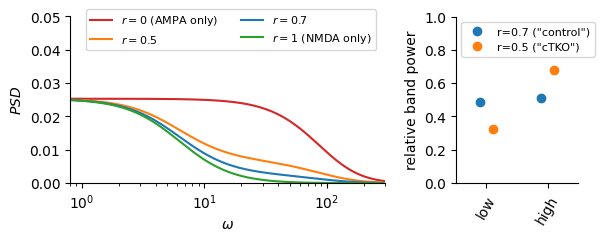

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import quad

# %matplotlib nbagg

w_arr = np.linspace(0, 1000, 10001)
FT = FT_kernel(w_arr, 0.5)

fig = plt.figure(figsize=(6, 2.5))
gs = fig.add_gridspec(1, 3)
ax_full_PSD = fig.add_subplot(gs[0, 0:2])
ax_bandwidth = fig.add_subplot(gs[0, 2])

# fig,ax = plt.subplots(1,2,figsize=(6,2.5))
# ax_full_PSD.fill_betweenx([0, 1], 2, 4, color="grey", alpha=0.5, lw=0)
# ax_full_PSD.fill_betweenx([0, 1], 30, 90, color="grey", alpha=0.5, lw=0)

# ax_full_PSD.text(1.5, 0.028, "  low \n($0.1-4\,$Hz)", fontsize=8)
# ax_full_PSD.text(25.0, 0.028, "  high \n($30-90\,$Hz)", fontsize=8)

labels = ["$r=0$ (AMPA only)", "$r=0.5$", "$r=0.7$", "$r=1$ (NMDA only)"]
colors = ["tab:red", "tab:orange", "tab:blue", "tab:green"]
for i, r in enumerate([0.0, 0.5, 0.7, 1.0]):
    # plt.plot(w_arr,FT_kernel(w_arr,r=r,current=False),label=f'r={r}')
    # ax[0].plot(w_arr,PSD_current(w_arr,r=r,tau_A=0.001,tau_N=0.2,tau_M=0.01,pl=False),label=f'r={r}')
    ax_full_PSD.plot(
        w_arr,
        PSD(w_arr, r=r, tau_A=0.006, tau_N=0.160, tau_M=0.01, pl=False),
        color=colors[i],
        label=labels[i],
    )  # ,label=f'r={r}')

# for axx in [ax[0]]:
ax_full_PSD.set_xscale("log")
plt.setp(
    ax_full_PSD,
    xlabel="$\omega$",
    ylabel="$PSD$",
    xlim=[8 * 10 ** (-1), 0.3 * 10**3],
    ylim=[0, 0.05],
)
ax_full_PSD.legend(loc=[0.05, 0.8], ncol=2, fontsize=8)
ax_full_PSD.spines[["top", "right"]].set_visible(False)

col = ["tab:orange", "tab:blue"]
# for p,PSD_fun in enumerate([PSD_current,PSD]):
# PSD_fun = PSD
for i, r in enumerate([0.5, 0.7]):
    PSD_total = quad(PSD, 0, np.inf, args=(r))[0]

    # PSD_low = quad(PSD, 0.01, 4, args=(r, 0.006, 0.160, 0.01))[0] / PSD_total
    PSD_low = quad(PSD, 0.0, 30, args=(r, 0.001, 0.150, 0.01))[0] / PSD_total
    PSD_high = quad(PSD, 30, np.inf, args=(r, 0.001, 0.150, 0.01))[0] / PSD_total
    # print(PSD_low,PSD_high)

    ax_bandwidth.plot(0.1 - i * 0.2, PSD_low, "o", color=col[i])
    ax_bandwidth.plot(1.1 - i * 0.2, PSD_high, "o", color=col[i])

ax_bandwidth.plot(0, np.NaN, "o", color="tab:blue", label='r=0.7 ("control")')
ax_bandwidth.plot(0, np.NaN, "o", color="tab:orange", label='r=0.5 ("cTKO")')

ax_bandwidth.legend(fontsize=8, loc="upper left")
plt.setp(
    ax_bandwidth,
    xlim=[-0.5, 1.5],
    ylim=[0, 1.0],
    xticks=[0, 1],
    # xticklabels=['$2-4\,$Hz','$30-90\,$Hz'])
    xticklabels=["low", "high"],
    ylabel="relative band power",
)
plt.setp(ax_bandwidth.get_xticklabels(), rotation=60)
ax_bandwidth.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
# fig.savefig("figures/PSD.pdf", bbox_inches='tight')

plt.show()